In [1]:
from unicodedata import numeric

import  pandas as pd
import recordlinkage
import re
import matplotlib.pyplot as plt


third_party = pd.read_csv('Kuda_ISW_Third_Party.csv')
#ThirdParty = pd.read_csv('Kuda_ISW_Third_Party.csv')

backend = pd.read_csv('Kuda_ISW_Backend.csv')
#Backend = pd.read_csv('Kuda_ISW_Backend.csv')

third_party.columns
#backend

Index(['id', 'transaction_date', 'value_date', 'transaction_type', 'amount',
       'amount_currency', 'balance', 'balance_currency', 'matching_reference',
       'reporting_tag', 'is_reversal', 'is_duplicate',
       'is_duplicate_parent_reference', 'matched', 'reversal', 'client_id',
       'account_id', 'batch_id', 'created', 'updated', 'fsp_accounts',
       'fsp_transaction_ids', 'backend_accounts', 'backend_transaction_ids',
       'other_accounts', 'other_transaction_ids', 'metadata', 'tags',
       'description'],
      dtype='object')

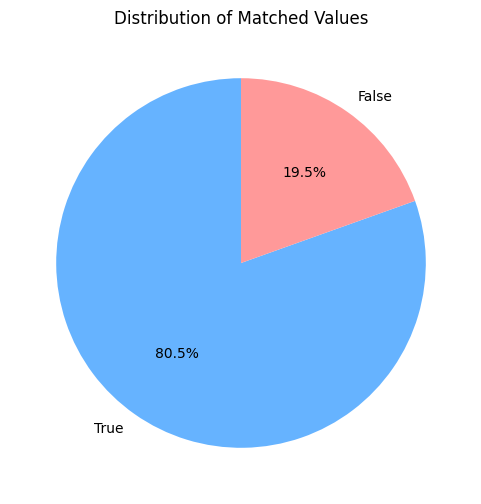

matched
True     22828
False     5544
Name: count, dtype: int64

In [2]:
# PLOT
matched_counts = third_party['matched'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    matched_counts,
    labels=matched_counts.index.map({True: 'True', False: 'False'}),
    autopct='%1.1f%%',
    colors=['#66b3ff','#ff9999'],
    startangle=90
)
plt.title('Distribution of Matched Values')
plt.show()
matched_counts

### 1361 are present in the third party file only and they are matched true.

22828-1361 = 21467

21467/(21467+5544) = 79.4750

79.475% reconciliation rate




In [3]:
def extract_terminal_and_rrn(df):
    # Split the 'description' column by '|'
    split_data = df['description'].str.split('|', expand=True)

    # Ensure that the split data has enough columns
    if split_data.shape[1] > 2:
        # Extract and assign the terminal_id and rrn to new columns
        df['terminal_id'] = split_data[1]
        df['rrn'] = split_data[2]
    else:
        # Handle cases where split data doesn't have enough columns
        df['terminal_id'] = None
        df['rrn'] = None

    return df

# Apply the function
third_party = extract_terminal_and_rrn(third_party)
third_party


,id,transaction_date,value_date,transaction_type,amount,amount_currency,balance,balance_currency,matching_reference,reporting_tag,...,fsp_transaction_ids,backend_accounts,backend_transaction_ids,other_accounts,other_transaction_ids,metadata,tags,description,terminal_id,rrn
0,384904780,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:29:19.000000 UTC,C,15300.0,NGN,0.0,NGN,[199@2044RBXA24081708291915300.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RBXA|240817082919,2044RBXA,240817082919
1,384904781,2024-08-17 00:00:00.000000 UTC,2024-08-17 09:32:53.000000 UTC,C,10000.0,NGN,0.0,NGN,[199@2044RCGR24081709325310000.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCGR|240817093253,2044RCGR,240817093253
2,384904789,2024-08-17 00:00:00.000000 UTC,2024-08-17 12:53:08.000000 UTC,C,2000.0,NGN,0.0,NGN,[199@2044RCGJ2408171253082000.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCGJ|240817125308,2044RCGJ,240817125308
3,384904790,2024-08-17 00:00:00.000000 UTC,2024-08-17 10:28:46.000000 UTC,C,51500.0,NGN,0.0,NGN,[199@2044RCHA24081710284651500.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCHA|240817102846,2044RCHA,240817102846
4,384904795,2024-08-17 00:00:00.000000 UTC,2024-08-17 14:12:18.000000 UTC,C,5000.0,NGN,0.0,NGN,[199@2044RCKG2408171412185000.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Default, Amount_Impact=-500...",[CardPayments],Goods and services|2044RCKG|240817141218,2044RCKG,240817141218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,384916794,2024-08-17 00:00:00.000000 UTC,2024-08-17 11:45:40.000000 UTC,C,1900.0,NGN,0.0,NGN,[199@2044RCMN2408171145401900.00],CardPayments,...,NaN,[827],[330084405],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCMN|240817114540,2044RCMN,240817114540
28368,384924216,2024-08-17 00:00:00.000000 UTC,2024-08-17 15:06:03.000000 UTC,C,15100.0,NGN,0.0,NGN,[199@2044RCGB24081715060315100.00],CardPayments,...,NaN,[827],[330045430],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCGB|240817150603,2044RCGB,240817150603
28369,384912451,2024-08-17 00:00:00.000000 UTC,2024-08-17 11:41:18.000000 UTC,C,1020.0,NGN,0.0,NGN,[199@2044RCMA2408171141181020.00],CardPayments,...,NaN,[827],[330085441],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCMA|240817114118,2044RCMA,240817114118
28370,384930889,2024-08-17 00:00:00.000000 UTC,2024-08-17 21:54:28.000000 UTC,C,3000.0,NGN,0.0,NGN,[199@2044RCJZ2408172154283000.00],CardPayments,...,NaN,[827],[329979849],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCJZ|240817215428,2044RCJZ,240817215428


In [4]:
def extract_terminal_and_rrn(df):

    # Split the 'description' column by '|'
    split_data = df['description'].str.split('|', expand=True)

    # Debug: Print the first few rows of split_data to verify the split
    print("Sample split_data:")
    print(split_data.head())

    # Ensure that the split data has enough columns
    if split_data.shape[1] > 2:
        # Extract and assign the terminal_id and rrn to new columns
        df['terminal_id'] = split_data[1].str.lower()
        df['rrn'] = split_data[2]
    else:
        # Handle cases where split data doesn't have enough columns
        df['terminal_id'] = None
        df['rrn'] = None
        print("Warning: Some 'description' values do not have the expected format.")

    return df

# Apply the function
third_party = extract_terminal_and_rrn(third_party)
third_party


Sample split_data:
                    0         1             2
0  Goods and services  2044RBXA  240817082919
1  Goods and services  2044RCGR  240817093253
2  Goods and services  2044RCGJ  240817125308
3  Goods and services  2044RCHA  240817102846
4  Goods and services  2044RCKG  240817141218


,id,transaction_date,value_date,transaction_type,amount,amount_currency,balance,balance_currency,matching_reference,reporting_tag,...,fsp_transaction_ids,backend_accounts,backend_transaction_ids,other_accounts,other_transaction_ids,metadata,tags,description,terminal_id,rrn
0,384904780,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:29:19.000000 UTC,C,15300.0,NGN,0.0,NGN,[199@2044RBXA24081708291915300.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RBXA|240817082919,2044rbxa,240817082919
1,384904781,2024-08-17 00:00:00.000000 UTC,2024-08-17 09:32:53.000000 UTC,C,10000.0,NGN,0.0,NGN,[199@2044RCGR24081709325310000.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCGR|240817093253,2044rcgr,240817093253
2,384904789,2024-08-17 00:00:00.000000 UTC,2024-08-17 12:53:08.000000 UTC,C,2000.0,NGN,0.0,NGN,[199@2044RCGJ2408171253082000.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCGJ|240817125308,2044rcgj,240817125308
3,384904790,2024-08-17 00:00:00.000000 UTC,2024-08-17 10:28:46.000000 UTC,C,51500.0,NGN,0.0,NGN,[199@2044RCHA24081710284651500.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCHA|240817102846,2044rcha,240817102846
4,384904795,2024-08-17 00:00:00.000000 UTC,2024-08-17 14:12:18.000000 UTC,C,5000.0,NGN,0.0,NGN,[199@2044RCKG2408171412185000.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{From_Account_Type=Default, Amount_Impact=-500...",[CardPayments],Goods and services|2044RCKG|240817141218,2044rckg,240817141218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,384916794,2024-08-17 00:00:00.000000 UTC,2024-08-17 11:45:40.000000 UTC,C,1900.0,NGN,0.0,NGN,[199@2044RCMN2408171145401900.00],CardPayments,...,NaN,[827],[330084405],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCMN|240817114540,2044rcmn,240817114540
28368,384924216,2024-08-17 00:00:00.000000 UTC,2024-08-17 15:06:03.000000 UTC,C,15100.0,NGN,0.0,NGN,[199@2044RCGB24081715060315100.00],CardPayments,...,NaN,[827],[330045430],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCGB|240817150603,2044rcgb,240817150603
28369,384912451,2024-08-17 00:00:00.000000 UTC,2024-08-17 11:41:18.000000 UTC,C,1020.0,NGN,0.0,NGN,[199@2044RCMA2408171141181020.00],CardPayments,...,NaN,[827],[330085441],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCMA|240817114118,2044rcma,240817114118
28370,384930889,2024-08-17 00:00:00.000000 UTC,2024-08-17 21:54:28.000000 UTC,C,3000.0,NGN,0.0,NGN,[199@2044RCJZ2408172154283000.00],CardPayments,...,NaN,[827],[329979849],NaN,NaN,"{From_Account_Type=Unknown Account Type, Amoun...",[CardPayments],Goods and services|2044RCJZ|240817215428,2044rcjz,240817215428


In [5]:
# Define the columns you want to select

# Rename the columns
third_party.rename(columns={
    'id': 'id_tp',
    'amount': 'amount_tp',
    'value_date': 'value_date_tp',
    'terminal_id': 'terminal_id_tp',
    'rrn': 'rrn_tp'
}, inplace=True)

columns_select = ['id_tp', 'amount_tp','value_date_tp', 'terminal_id_tp', 'rrn_tp','backend_transaction_ids','matched']
#,'matching_reference'

# Select the desired columns from the DataFrame
third_party = third_party[columns_select]
third_party

,id_tp,amount_tp,value_date_tp,terminal_id_tp,rrn_tp,backend_transaction_ids,matched
0,384904780,15300.0,2024-08-17 08:29:19.000000 UTC,2044rbxa,240817082919,NaN,False
1,384904781,10000.0,2024-08-17 09:32:53.000000 UTC,2044rcgr,240817093253,NaN,False
2,384904789,2000.0,2024-08-17 12:53:08.000000 UTC,2044rcgj,240817125308,NaN,False
3,384904790,51500.0,2024-08-17 10:28:46.000000 UTC,2044rcha,240817102846,NaN,False
4,384904795,5000.0,2024-08-17 14:12:18.000000 UTC,2044rckg,240817141218,NaN,False
...,...,...,...,...,...,...,...
28367,384916794,1900.0,2024-08-17 11:45:40.000000 UTC,2044rcmn,240817114540,[330084405],True
28368,384924216,15100.0,2024-08-17 15:06:03.000000 UTC,2044rcgb,240817150603,[330045430],True
28369,384912451,1020.0,2024-08-17 11:41:18.000000 UTC,2044rcma,240817114118,[330085441],True
28370,384930889,3000.0,2024-08-17 21:54:28.000000 UTC,2044rcjz,240817215428,[329979849],True


In [6]:
def extract_metadata_values(df):
    # Define regex patterns for tid and rrn
    tid_pattern = re.compile(r'tid=([^,}]+)')
    rrn_pattern = re.compile(r'rrn=([^,}]+)')

    # Extract tid and rrn using regex and create new columns
    df['terminal_id'] = df['metadata'].apply(lambda x: tid_pattern.search(x).group(1) if tid_pattern.search(x) else None)
    df['rrn'] = df['metadata'].apply(lambda x: rrn_pattern.search(x).group(1) if rrn_pattern.search(x) else None)

    return df

# Apply the function to extract values
backend = extract_metadata_values(backend)
backend

,id,transaction_date,value_date,transaction_type,amount,amount_currency,balance,balance_currency,matching_reference,reporting_tag,...,fsp_transaction_ids,backend_accounts,backend_transaction_ids,other_accounts,other_transaction_ids,metadata,tags,description,terminal_id,rrn
0,330048362,2024-08-17 00:00:00.000000 UTC,2024-08-17 03:42:24.000000 UTC,D,1050.0,NGN,0.0,NGN,[199@2044RCCJ2408171501101050.00],CardPayments,...,NaN,NaN,NaN,[1321],[384692937],"{transaction_date=2024-08-17 03:42:24, Instrum...",[CardPayments],D|2024-08-17_2044rccj_240817150110374509|24081...,2044rccj,240817150110
1,330104929,2024-08-17 00:00:00.000000 UTC,2024-08-17 10:17:57.000000 UTC,D,18300.0,NGN,0.0,NGN,[199@2044RCKM24081710175118300.00],CardPayments,...,NaN,NaN,NaN,[1321],[384670450],"{transaction_date=2024-08-17 10:17:57, Instrum...",[CardPayments],D|2024-08-17_2044rckm_240817101751245792|24081...,2044rckm,240817101751
2,330106283,2024-08-17 00:00:00.000000 UTC,2024-08-17 10:12:08.000000 UTC,D,25400.0,NGN,0.0,NGN,[199@2044RBZZ24081710120525400.00],CardPayments,...,NaN,NaN,NaN,[1322],[384905085],"{transaction_date=2024-08-17 10:12:08, Instrum...",[CardPayments],D|2024-08-17_2044rbzz_240817101205243116|24081...,2044rbzz,240817101205
3,329988271,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:37:14.000000 UTC,D,3500.0,NGN,0.0,NGN,[199@2044RBZU2408172037103500.00],CardPayments,...,NaN,NaN,NaN,[1322],[385013735],"{transaction_date=2024-08-17 08:37:14, Instrum...",[CardPayments],D|2024-08-17_2044rbzu_240817203710539090|24081...,2044rbzu,240817203710
4,330107818,2024-08-17 00:00:00.000000 UTC,2024-08-17 10:05:27.000000 UTC,D,10100.0,NGN,0.0,NGN,[199@2044RBXL24081710052210100.00],CardPayments,...,NaN,NaN,NaN,[1322],[384992501],"{transaction_date=2024-08-17 10:05:27, Instrum...",[CardPayments],D|2024-08-17_2044rbxl_240817100522240104|24081...,2044rbxl,240817100522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161579,329988061,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:38:48.000000 UTC,D,5000.0,NGN,0.0,NGN,[199@2044RCAA2408172038415000.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-08-17 08:38:48, Instrum...",[CardPayments],D|2024-08-17_2044rcaa_240817203841539618|24081...,2044rcaa,240817203841
161580,329988063,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:38:46.000000 UTC,D,3500.0,NGN,0.0,NGN,[199@2044RBWS2408172038453500.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-08-17 08:38:46, Instrum...",[CardPayments],D|2024-08-17_2044rbws_240817203845539614|24081...,2044rbws,240817203845
161581,329988064,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:38:46.000000 UTC,D,2100.0,NGN,0.0,NGN,[199@2044RCPK2408172038432100.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-08-17 08:38:46, Instrum...",[CardPayments],D|2024-08-17_2044rcpk_240817203843539612|24081...,2044rcpk,240817203843
161582,329988069,2024-08-17 00:00:00.000000 UTC,2024-08-17 08:38:44.000000 UTC,D,700.0,NGN,0.0,NGN,[199@2044RCKJ240817203842700.00],CardPayments,...,NaN,NaN,NaN,NaN,NaN,"{transaction_date=2024-08-17 08:38:44, Instrum...",[CardPayments],D|2024-08-17_2044rckj_240817203842539604|24081...,2044rckj,240817203842


In [7]:
# Define the columns you want to select

# Rename the columns
backend.rename(columns={
    'id': 'id_b',
    'amount': 'amount_b',
    'value_date': 'value_date_b',
    'terminal_id': 'terminal_id_b',
    'rrn': 'rrn_b'
}, inplace=True)

columns_select = ['id_b', 'amount_b','value_date_b', 'terminal_id_b', 'rrn_b']


# Select the desired columns from the DataFrame
backend = backend[columns_select]
backend

,id_b,amount_b,value_date_b,terminal_id_b,rrn_b
0,330048362,1050.0,2024-08-17 03:42:24.000000 UTC,2044rccj,240817150110
1,330104929,18300.0,2024-08-17 10:17:57.000000 UTC,2044rckm,240817101751
2,330106283,25400.0,2024-08-17 10:12:08.000000 UTC,2044rbzz,240817101205
3,329988271,3500.0,2024-08-17 08:37:14.000000 UTC,2044rbzu,240817203710
4,330107818,10100.0,2024-08-17 10:05:27.000000 UTC,2044rbxl,240817100522
...,...,...,...,...,...
161579,329988061,5000.0,2024-08-17 08:38:48.000000 UTC,2044rcaa,240817203841
161580,329988063,3500.0,2024-08-17 08:38:46.000000 UTC,2044rbws,240817203845
161581,329988064,2100.0,2024-08-17 08:38:46.000000 UTC,2044rcpk,240817203843
161582,329988069,700.0,2024-08-17 08:38:44.000000 UTC,2044rckj,240817203842


In [8]:
## Format the date

backend["value_date_b"] = pd.to_datetime(backend["value_date_b"]).dt.date
print(backend)
third_party["value_date_b"] = pd.to_datetime(third_party["value_date_tp"]).dt.date
third_party


/tmp/ipykernel_7838/2793778461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  backend["value_date_b"] = pd.to_datetime(backend["value_date_b"]).dt.date


             id_b  amount_b value_date_b terminal_id_b         rrn_b
0       330048362    1050.0   2024-08-17      2044rccj  240817150110
1       330104929   18300.0   2024-08-17      2044rckm  240817101751
2       330106283   25400.0   2024-08-17      2044rbzz  240817101205
3       329988271    3500.0   2024-08-17      2044rbzu  240817203710
4       330107818   10100.0   2024-08-17      2044rbxl  240817100522
...           ...       ...          ...           ...           ...
161579  329988061    5000.0   2024-08-17      2044rcaa  240817203841
161580  329988063    3500.0   2024-08-17      2044rbws  240817203845
161581  329988064    2100.0   2024-08-17      2044rcpk  240817203843
161582  329988069     700.0   2024-08-17      2044rckj  240817203842
161583  330074837    8500.0   2024-08-17      2044rcbn  240817123007

[161584 rows x 5 columns]


/tmp/ipykernel_7838/2793778461.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  third_party["value_date_b"] = pd.to_datetime(third_party["value_date_tp"]).dt.date


,id_tp,amount_tp,value_date_tp,terminal_id_tp,rrn_tp,backend_transaction_ids,matched,value_date_b
0,384904780,15300.0,2024-08-17 08:29:19.000000 UTC,2044rbxa,240817082919,NaN,False,2024-08-17
1,384904781,10000.0,2024-08-17 09:32:53.000000 UTC,2044rcgr,240817093253,NaN,False,2024-08-17
2,384904789,2000.0,2024-08-17 12:53:08.000000 UTC,2044rcgj,240817125308,NaN,False,2024-08-17
3,384904790,51500.0,2024-08-17 10:28:46.000000 UTC,2044rcha,240817102846,NaN,False,2024-08-17
4,384904795,5000.0,2024-08-17 14:12:18.000000 UTC,2044rckg,240817141218,NaN,False,2024-08-17
...,...,...,...,...,...,...,...,...
28367,384916794,1900.0,2024-08-17 11:45:40.000000 UTC,2044rcmn,240817114540,[330084405],True,2024-08-17
28368,384924216,15100.0,2024-08-17 15:06:03.000000 UTC,2044rcgb,240817150603,[330045430],True,2024-08-17
28369,384912451,1020.0,2024-08-17 11:41:18.000000 UTC,2044rcma,240817114118,[330085441],True,2024-08-17
28370,384930889,3000.0,2024-08-17 21:54:28.000000 UTC,2044rcjz,240817215428,[329979849],True,2024-08-17


In [9]:
### Fuzzy record linkage
indexer = recordlinkage.Index()
indexer.block(left_on="terminal_id_tp",right_on="terminal_id_b")

## candidates
candidates = indexer.index(third_party,backend)
len(candidates)

8737742

In [10]:
# Initialize compare classes

compare = recordlinkage.Compare()

compare.numeric("amount_tp","amount_b", label ='amount')
compare.string("terminal_id_tp","terminal_id_b", label ='terminal_id')
compare.string("rrn_tp","rrn_b", label ='rrn')

features = compare.compute(candidates, third_party, backend)

In [11]:
features['sum'] = features['amount'] + features['rrn'] + features['terminal_id']
features

amount  terminal_id       rrn       sum
0     26         0.0          1.0  0.583333  1.583333
      441        0.0          1.0  0.500000  1.500000
      1646       0.0          1.0  0.583333  1.583333
      1865       0.0          1.0  0.666667  1.666667
      3343       0.0          1.0  0.500000  1.500000
...              ...          ...       ...       ...
28228 158415     0.0          1.0  0.500000  1.500000
      160089     0.0          1.0  0.500000  1.500000
      160635     0.0          1.0  0.583333  1.583333
      160912     0.0          1.0  0.500000  1.500000
      161192     0.0          1.0  0.500000  1.500000

[8737742 rows x 4 columns]

In [12]:
features = features.reset_index()
features.rename(columns={features.columns[0]: 'index_tp'}, inplace=True)
features.rename(columns={features.columns[1]: 'index_b'}, inplace=True)
features


,index_tp,index_b,amount,terminal_id,rrn,sum
0,0,26,0.0,1.0,0.583333,1.583333
1,0,441,0.0,1.0,0.500000,1.500000
2,0,1646,0.0,1.0,0.583333,1.583333
3,0,1865,0.0,1.0,0.666667,1.666667
4,0,3343,0.0,1.0,0.500000,1.500000
...,...,...,...,...,...,...
8737737,28228,158415,0.0,1.0,0.500000,1.500000
8737738,28228,160089,0.0,1.0,0.500000,1.500000
8737739,28228,160635,0.0,1.0,0.583333,1.583333
8737740,28228,160912,0.0,1.0,0.500000,1.500000


In [13]:
# Semi merges

third_party_sec = third_party.reset_index()
third_party_sec.rename(columns={'index':'index_tp'}, inplace=True)

backend_sec = backend.reset_index()
backend_sec.rename(columns={'index':'index_b'}, inplace=True)

#third_party_sec = third_party_sec.iloc[:,:2]
third_party_sec.rename(columns={third_party_sec.columns[1]: 'id_tp'}, inplace=True)

#backend_sec = backend_sec.iloc[:,:2]
backend_sec.rename(columns={backend_sec.columns[1]: 'id_b'}, inplace=True)

third_party
backend_sec


,index_b,id_b,amount_b,value_date_b,terminal_id_b,rrn_b
0,0,330048362,1050.0,2024-08-17,2044rccj,240817150110
1,1,330104929,18300.0,2024-08-17,2044rckm,240817101751
2,2,330106283,25400.0,2024-08-17,2044rbzz,240817101205
3,3,329988271,3500.0,2024-08-17,2044rbzu,240817203710
4,4,330107818,10100.0,2024-08-17,2044rbxl,240817100522
...,...,...,...,...,...,...
161579,161579,329988061,5000.0,2024-08-17,2044rcaa,240817203841
161580,161580,329988063,3500.0,2024-08-17,2044rbws,240817203845
161581,161581,329988064,2100.0,2024-08-17,2044rcpk,240817203843
161582,161582,329988069,700.0,2024-08-17,2044rckj,240817203842


In [14]:

#merged_third_party = pd.merge(third_party,best_match, left_on='id_tp', right_on='id_tp', how='left', indicator=True)
semi_merged = pd.merge(backend_sec,features, left_on='index_b', right_on='index_b', how='left', indicator=True)

# Drop the indicator column if it already exists in the second merge
if '_merge' in third_party_sec.columns:
    third_party_sec = third_party_sec.drop(columns=['_merge'])

partial_merged = pd.merge(third_party_sec,semi_merged, right_on='index_tp', left_on='index_tp', how='right', indicator='merge_indicator')

partial_merged

,index_tp,id_tp,amount_tp,value_date_tp,terminal_id_tp,rrn_tp,backend_transaction_ids,matched,value_date_b_x,index_b,...,amount_b,value_date_b_y,terminal_id_b,rrn_b,amount,terminal_id,rrn,sum,_merge,merge_indicator
0,93,384905272,4000.0,2024-08-17 08:15:06.000000 UTC,2044rccj,240817081506,NaN,False,2024-08-17,0,...,1050.0,2024-08-17,2044rccj,240817150110,0.0,1.0,0.583333,1.583333,both,both
1,220,384905894,5100.0,2024-08-17 15:41:58.000000 UTC,2044rccj,240817154158,NaN,False,2024-08-17,0,...,1050.0,2024-08-17,2044rccj,240817150110,0.0,1.0,0.750000,1.750000,both,both
2,274,384906141,1000.0,2024-08-17 13:54:04.000000 UTC,2044rccj,240817135404,NaN,False,2024-08-17,0,...,1050.0,2024-08-17,2044rccj,240817150110,0.0,1.0,0.583333,1.583333,both,both
3,448,384907045,20400.0,2024-08-17 09:42:57.000000 UTC,2044rccj,240817094257,NaN,False,2024-08-17,0,...,1050.0,2024-08-17,2044rccj,240817150110,0.0,1.0,0.500000,1.500000,both,both
4,1917,384912484,2100.0,2024-08-17 11:19:26.000000 UTC,2044rccj,240817111926,[330090536],True,2024-08-17,0,...,1050.0,2024-08-17,2044rccj,240817150110,0.0,1.0,0.583333,1.583333,both,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8737737,23771,384922136,5200.0,2024-08-17 11:37:46.000000 UTC,2044rcbn,240817113746,[330086220],True,2024-08-17,161583,...,8500.0,2024-08-17,2044rcbn,240817123007,0.0,1.0,0.666667,1.666667,both,both
8737738,25115,384922399,4100.0,2024-08-17 08:14:50.000000 UTC,2044rcbn,240817081450,[330131382],True,2024-08-17,161583,...,8500.0,2024-08-17,2044rcbn,240817123007,0.0,1.0,0.500000,1.500000,both,both
8737739,25999,384909620,6000.0,2024-08-17 13:21:48.000000 UTC,2044rcbn,240817132148,[330063652],True,2024-08-17,161583,...,8500.0,2024-08-17,2044rcbn,240817123007,0.0,1.0,0.583333,1.583333,both,both
8737740,27988,384925310,9800.0,2024-08-17 16:03:30.000000 UTC,2044rcbn,240817160330,[330031186],True,2024-08-17,161583,...,8500.0,2024-08-17,2044rcbn,240817123007,0.0,1.0,0.666667,1.666667,both,both


In [15]:
best_match = partial_merged.loc[partial_merged.groupby("id_tp")['sum'].idxmax()]
best_match

,index_tp,id_tp,amount_tp,value_date_tp,terminal_id_tp,rrn_tp,backend_transaction_ids,matched,value_date_b_x,index_b,...,amount_b,value_date_b_y,terminal_id_b,rrn_b,amount,terminal_id,rrn,sum,_merge,merge_indicator
7390303,21441,384904777,6200.0,2024-08-17 12:51:17.000000 UTC,2044rbyj,240817125117,[330070732],True,2024-08-17,136682,...,6200.0,2024-08-17,2044rbyj,240817125117,1.0,1.0,1.000000,3.000000,both,both
6744404,12640,384904778,1300.0,2024-08-17 20:28:02.000000 UTC,2044rcnl,240817202802,[329989693],True,2024-08-17,124753,...,1300.0,2024-08-17,2044rcnl,240817202802,1.0,1.0,1.000000,3.000000,both,both
2893064,8216,384904779,3000.0,2024-08-17 13:13:07.000000 UTC,2044rclc,240817131307,[330066023],True,2024-08-17,53530,...,3000.0,2024-08-17,2044rclc,240817131307,1.0,1.0,1.000000,3.000000,both,both
3614787,0,384904780,15300.0,2024-08-17 08:29:19.000000 UTC,2044rbxa,240817082919,NaN,False,2024-08-17,66878,...,15300.0,2024-08-17,2044rbxa,240817154140,1.0,1.0,0.500000,2.500000,both,both
2813975,1,384904781,10000.0,2024-08-17 09:32:53.000000 UTC,2044rcgr,240817093253,NaN,False,2024-08-17,52069,...,10000.0,2024-08-17,2044rcgr,240817121743,1.0,1.0,0.583333,2.583333,both,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416728,27237,384933144,1000.0,2024-08-17 13:55:42.000000 UTC,2044rcjw,240817135542,[330052788],True,2024-08-17,44725,...,1000.0,2024-08-17,2044rcjw,240817135542,1.0,1.0,1.000000,3.000000,both,both
6225869,19915,384933145,1600.0,2024-08-17 06:50:27.000000 UTC,2044rclg,240817065027,[330136905],True,2024-08-17,115183,...,1600.0,2024-08-17,2044rclg,240817065027,1.0,1.0,1.000000,3.000000,both,both
4996767,8005,384933146,2150.0,2024-08-17 19:05:18.000000 UTC,2044rbza,240817190518,[330003953],True,2024-08-17,92447,...,2150.0,2024-08-17,2044rbza,240817190518,1.0,1.0,1.000000,3.000000,both,both
5829188,22478,384933147,1900.0,2024-08-17 18:23:04.000000 UTC,2044rcfy,240817182304,[330012021],True,2024-08-17,107855,...,1900.0,2024-08-17,2044rcfy,240817182304,1.0,1.0,1.000000,3.000000,both,both


In [16]:
threshold = 2.9

best_match['fuzzy_matched'] = best_match['sum'] >= threshold
best_match

,index_tp,id_tp,amount_tp,value_date_tp,terminal_id_tp,rrn_tp,backend_transaction_ids,matched,value_date_b_x,index_b,...,value_date_b_y,terminal_id_b,rrn_b,amount,terminal_id,rrn,sum,_merge,merge_indicator,fuzzy_matched
7390303,21441,384904777,6200.0,2024-08-17 12:51:17.000000 UTC,2044rbyj,240817125117,[330070732],True,2024-08-17,136682,...,2024-08-17,2044rbyj,240817125117,1.0,1.0,1.000000,3.000000,both,both,True
6744404,12640,384904778,1300.0,2024-08-17 20:28:02.000000 UTC,2044rcnl,240817202802,[329989693],True,2024-08-17,124753,...,2024-08-17,2044rcnl,240817202802,1.0,1.0,1.000000,3.000000,both,both,True
2893064,8216,384904779,3000.0,2024-08-17 13:13:07.000000 UTC,2044rclc,240817131307,[330066023],True,2024-08-17,53530,...,2024-08-17,2044rclc,240817131307,1.0,1.0,1.000000,3.000000,both,both,True
3614787,0,384904780,15300.0,2024-08-17 08:29:19.000000 UTC,2044rbxa,240817082919,NaN,False,2024-08-17,66878,...,2024-08-17,2044rbxa,240817154140,1.0,1.0,0.500000,2.500000,both,both,False
2813975,1,384904781,10000.0,2024-08-17 09:32:53.000000 UTC,2044rcgr,240817093253,NaN,False,2024-08-17,52069,...,2024-08-17,2044rcgr,240817121743,1.0,1.0,0.583333,2.583333,both,both,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416728,27237,384933144,1000.0,2024-08-17 13:55:42.000000 UTC,2044rcjw,240817135542,[330052788],True,2024-08-17,44725,...,2024-08-17,2044rcjw,240817135542,1.0,1.0,1.000000,3.000000,both,both,True
6225869,19915,384933145,1600.0,2024-08-17 06:50:27.000000 UTC,2044rclg,240817065027,[330136905],True,2024-08-17,115183,...,2024-08-17,2044rclg,240817065027,1.0,1.0,1.000000,3.000000,both,both,True
4996767,8005,384933146,2150.0,2024-08-17 19:05:18.000000 UTC,2044rbza,240817190518,[330003953],True,2024-08-17,92447,...,2024-08-17,2044rbza,240817190518,1.0,1.0,1.000000,3.000000,both,both,True
5829188,22478,384933147,1900.0,2024-08-17 18:23:04.000000 UTC,2044rcfy,240817182304,[330012021],True,2024-08-17,107855,...,2024-08-17,2044rcfy,240817182304,1.0,1.0,1.000000,3.000000,both,both,True


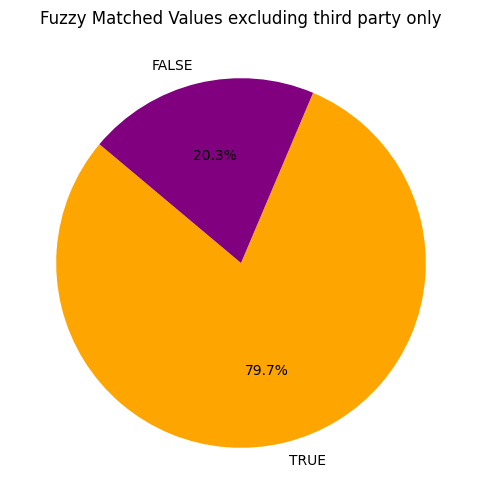

fuzzy_matched
True     21537
False     5474
Name: count, dtype: int64


In [17]:
import matplotlib.pyplot as plt

# Count the number of TRUE and FALSE values in the 'fuzzy_matched' column
best_match_counts = best_match['fuzzy_matched'].value_counts()

# Define the labels and sizes for the pie chart
labels = ['TRUE', 'FALSE']
sizes = [best_match_counts[True], best_match_counts[False]]
colors = ['orange', 'purple']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Fuzzy Matched Values excluding third party only')
plt.show()
print(best_match_counts)

In [18]:
third_party

,id_tp,amount_tp,value_date_tp,terminal_id_tp,rrn_tp,backend_transaction_ids,matched,value_date_b
0,384904780,15300.0,2024-08-17 08:29:19.000000 UTC,2044rbxa,240817082919,NaN,False,2024-08-17
1,384904781,10000.0,2024-08-17 09:32:53.000000 UTC,2044rcgr,240817093253,NaN,False,2024-08-17
2,384904789,2000.0,2024-08-17 12:53:08.000000 UTC,2044rcgj,240817125308,NaN,False,2024-08-17
3,384904790,51500.0,2024-08-17 10:28:46.000000 UTC,2044rcha,240817102846,NaN,False,2024-08-17
4,384904795,5000.0,2024-08-17 14:12:18.000000 UTC,2044rckg,240817141218,NaN,False,2024-08-17
...,...,...,...,...,...,...,...,...
28367,384916794,1900.0,2024-08-17 11:45:40.000000 UTC,2044rcmn,240817114540,[330084405],True,2024-08-17
28368,384924216,15100.0,2024-08-17 15:06:03.000000 UTC,2044rcgb,240817150603,[330045430],True,2024-08-17
28369,384912451,1020.0,2024-08-17 11:41:18.000000 UTC,2044rcma,240817114118,[330085441],True,2024-08-17
28370,384930889,3000.0,2024-08-17 21:54:28.000000 UTC,2044rcjz,240817215428,[329979849],True,2024-08-17


In [19]:
best_match['id_tp']=best_match['id_tp'].astype(int)
best_match['id_b']=best_match['id_b'].astype(int)
best_match['index_tp']=best_match['index_tp'].astype(int)
best_match['index_b']=best_match['index_b'].astype(int)


best_match

,index_tp,id_tp,amount_tp,value_date_tp,terminal_id_tp,rrn_tp,backend_transaction_ids,matched,value_date_b_x,index_b,...,value_date_b_y,terminal_id_b,rrn_b,amount,terminal_id,rrn,sum,_merge,merge_indicator,fuzzy_matched
7390303,21441,384904777,6200.0,2024-08-17 12:51:17.000000 UTC,2044rbyj,240817125117,[330070732],True,2024-08-17,136682,...,2024-08-17,2044rbyj,240817125117,1.0,1.0,1.000000,3.000000,both,both,True
6744404,12640,384904778,1300.0,2024-08-17 20:28:02.000000 UTC,2044rcnl,240817202802,[329989693],True,2024-08-17,124753,...,2024-08-17,2044rcnl,240817202802,1.0,1.0,1.000000,3.000000,both,both,True
2893064,8216,384904779,3000.0,2024-08-17 13:13:07.000000 UTC,2044rclc,240817131307,[330066023],True,2024-08-17,53530,...,2024-08-17,2044rclc,240817131307,1.0,1.0,1.000000,3.000000,both,both,True
3614787,0,384904780,15300.0,2024-08-17 08:29:19.000000 UTC,2044rbxa,240817082919,NaN,False,2024-08-17,66878,...,2024-08-17,2044rbxa,240817154140,1.0,1.0,0.500000,2.500000,both,both,False
2813975,1,384904781,10000.0,2024-08-17 09:32:53.000000 UTC,2044rcgr,240817093253,NaN,False,2024-08-17,52069,...,2024-08-17,2044rcgr,240817121743,1.0,1.0,0.583333,2.583333,both,both,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2416728,27237,384933144,1000.0,2024-08-17 13:55:42.000000 UTC,2044rcjw,240817135542,[330052788],True,2024-08-17,44725,...,2024-08-17,2044rcjw,240817135542,1.0,1.0,1.000000,3.000000,both,both,True
6225869,19915,384933145,1600.0,2024-08-17 06:50:27.000000 UTC,2044rclg,240817065027,[330136905],True,2024-08-17,115183,...,2024-08-17,2044rclg,240817065027,1.0,1.0,1.000000,3.000000,both,both,True
4996767,8005,384933146,2150.0,2024-08-17 19:05:18.000000 UTC,2044rbza,240817190518,[330003953],True,2024-08-17,92447,...,2024-08-17,2044rbza,240817190518,1.0,1.0,1.000000,3.000000,both,both,True
5829188,22478,384933147,1900.0,2024-08-17 18:23:04.000000 UTC,2044rcfy,240817182304,[330012021],True,2024-08-17,107855,...,2024-08-17,2044rcfy,240817182304,1.0,1.0,1.000000,3.000000,both,both,True


In [20]:
backend

,id_b,amount_b,value_date_b,terminal_id_b,rrn_b
0,330048362,1050.0,2024-08-17,2044rccj,240817150110
1,330104929,18300.0,2024-08-17,2044rckm,240817101751
2,330106283,25400.0,2024-08-17,2044rbzz,240817101205
3,329988271,3500.0,2024-08-17,2044rbzu,240817203710
4,330107818,10100.0,2024-08-17,2044rbxl,240817100522
...,...,...,...,...,...
161579,329988061,5000.0,2024-08-17,2044rcaa,240817203841
161580,329988063,3500.0,2024-08-17,2044rbws,240817203845
161581,329988064,2100.0,2024-08-17,2044rcpk,240817203843
161582,329988069,700.0,2024-08-17,2044rckj,240817203842


In [21]:
third_party_sec.rename(columns={'id':'id_tp'}, inplace=True)

merged_third_party = pd.merge(third_party,best_match, left_on='id_tp', right_on='id_tp', how='left')

merged_third_party.columns

Index(['id_tp', 'amount_tp_x', 'value_date_tp_x', 'terminal_id_tp_x',
       'rrn_tp_x', 'backend_transaction_ids_x', 'matched_x', 'value_date_b',
       'index_tp', 'amount_tp_y', 'value_date_tp_y', 'terminal_id_tp_y',
       'rrn_tp_y', 'backend_transaction_ids_y', 'matched_y', 'value_date_b_x',
       'index_b', 'id_b', 'amount_b', 'value_date_b_y', 'terminal_id_b',
       'rrn_b', 'amount', 'terminal_id', 'rrn', 'sum', '_merge',
       'merge_indicator', 'fuzzy_matched'],
      dtype='object')

In [22]:
# # NAN in fuzzy_matched to false as they only exist in the third_party file
merged_third_party['fuzzy_matched'] = merged_third_party['fuzzy_matched'].fillna(True)

new_order=['id_tp','id_b','backend_transaction_ids_x','fuzzy_matched','matched_x','amount_tp_x','amount_b','amount','terminal_id_tp_x','terminal_id_b','terminal_id','rrn_tp_x','rrn_b','rrn','sum']

merged_third_party = merged_third_party[new_order]
merged_third_party


,id_tp,id_b,backend_transaction_ids_x,fuzzy_matched,matched_x,amount_tp_x,amount_b,amount,terminal_id_tp_x,terminal_id_b,terminal_id,rrn_tp_x,rrn_b,rrn,sum
0,384904780,330039848.0,NaN,False,False,15300.0,15300.0,1.0,2044rbxa,2044rbxa,1.0,240817082919,240817154140,0.500000,2.500000
1,384904781,330077266.0,NaN,False,False,10000.0,10000.0,1.0,2044rcgr,2044rcgr,1.0,240817093253,240817121743,0.583333,2.583333
2,384904789,330007871.0,NaN,False,False,2000.0,2000.0,1.0,2044rcgj,2044rcgj,1.0,240817125308,240817184530,0.750000,2.750000
3,384904790,329999617.0,NaN,False,False,51500.0,2000.0,0.0,2044rcha,2044rcha,1.0,240817102846,240817192846,0.916667,1.916667
4,384904795,330042589.0,NaN,False,False,5000.0,5000.0,1.0,2044rckg,2044rckg,1.0,240817141218,240817151518,0.833333,2.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,384916794,330084405.0,[330084405],True,True,1900.0,1900.0,1.0,2044rcmn,2044rcmn,1.0,240817114540,240817114540,1.000000,3.000000
28368,384924216,330045430.0,[330045430],True,True,15100.0,15100.0,1.0,2044rcgb,2044rcgb,1.0,240817150603,240817150603,1.000000,3.000000
28369,384912451,330085441.0,[330085441],True,True,1020.0,1020.0,1.0,2044rcma,2044rcma,1.0,240817114118,240817114118,1.000000,3.000000
28370,384930889,329979849.0,[329979849],True,True,3000.0,3000.0,1.0,2044rcjz,2044rcjz,1.0,240817215428,240817215428,1.000000,3.000000


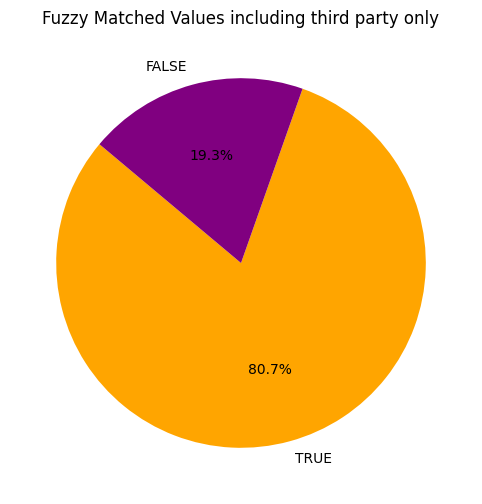

fuzzy_matched
True     21537
False     5474
Name: count, dtype: int64


In [23]:
import matplotlib.pyplot as plt

# Count the number of TRUE and FALSE values in the 'fuzzy_matched' column
merged_third_party_counts = merged_third_party['fuzzy_matched'].value_counts()

# Define the labels and sizes for the pie chart
labels = ['TRUE', 'FALSE']
sizes = [merged_third_party_counts[True], merged_third_party_counts[False]]
colors = ['orange', 'purple']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Fuzzy Matched Values including third party only')
plt.show()
print(best_match_counts)